# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [81]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.datasets import load_diabetes
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [87]:
df = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [88]:
df.sample(4)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1382,B0_941,70,13,UTF-8,nginx,NaN,US,CA,7/09/1995 0:00,4/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
164,B0_560,30,6,utf-8,NaN,NaN,US,CA,22/02/1996 0:00,16/01/2015 0:00,...,23,3,3605,39,41,34388,4183,39,8.0,0
1708,B0_166,117,22,UTF-8,nginx,NaN,NaN,NaN,23/05/1995 0:00,21/05/2015 0:00,...,6,5,2278,27,25,2847,2758,27,6.0,0
718,B0_485,45,9,UTF-8,mw2097.codfw.wmnet,NaN,US,CA,13/01/2001 0:12,12/12/2015 10:16,...,43,7,10205,69,56,38894,11305,69,14.0,0


In [89]:
df.info()

"""
Based on the Dataset we have a sample for bening or malicious websites.

We should make the dependable variable the "Type" Column and predict if true:"1" or false:"2" the origin of 
the website.

We have several columns to take into consideration: Charset, Server, State, Country, Date, Query_times
and APP_packets if you want to know the average time of connection and download content, depends on
what we are trying to predict or train our model.


"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

'\nBased on the Dataset we have a sample for bening or malicious websites.\n\nWe should make the dependable variable the "Type" Column and predict if true:"1" or false:"2" the origin of \nthe website.\n\nWe have several columns to take into consideration: Charset, Server, State, Country, Date, Query_times\nand APP_packets if you want to know the average time of connection and download content, depends on\nwhat we are trying to predict or train our model.\n\n\n'

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

<Axes: >

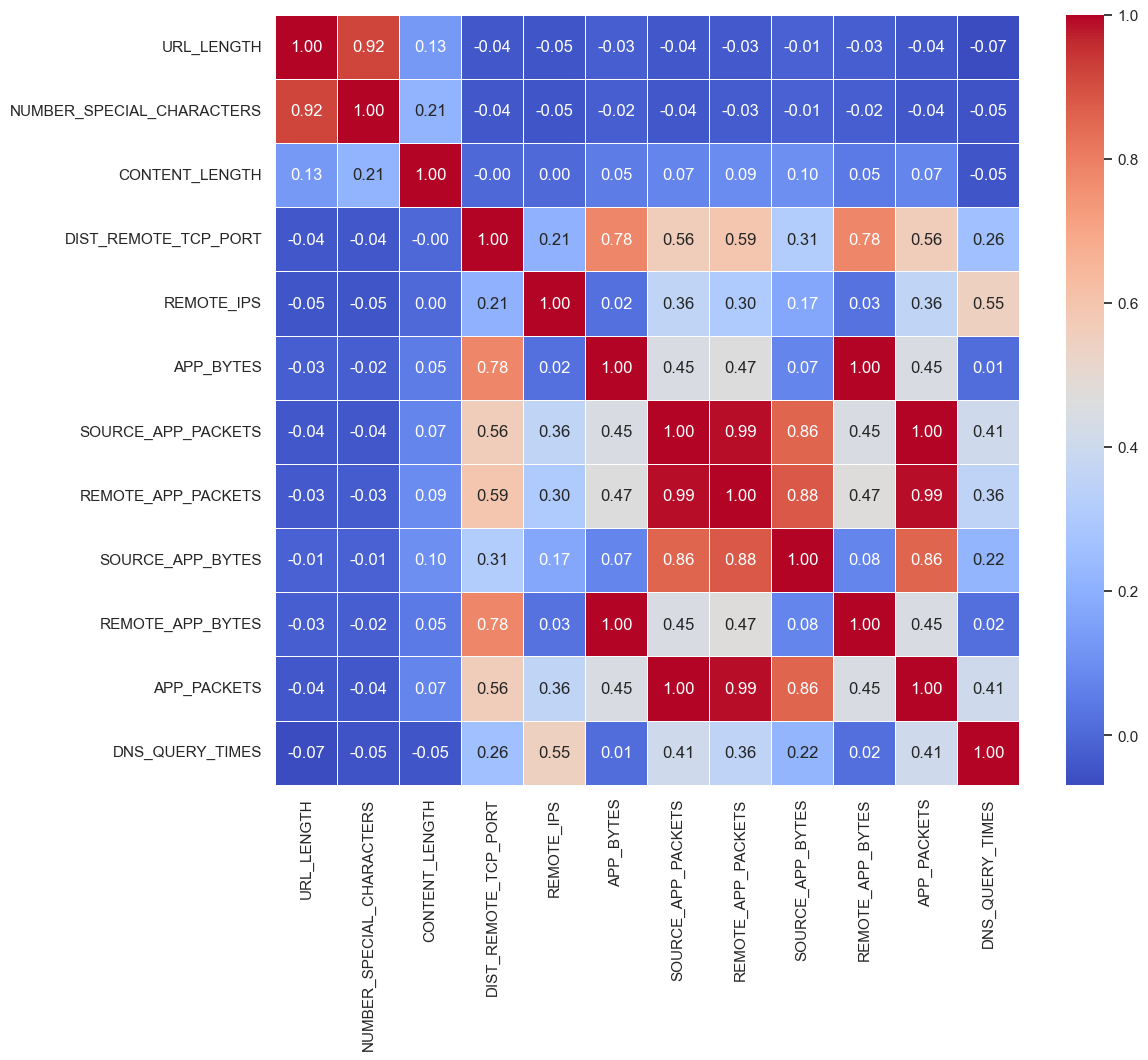

In [ ]:
columns = ['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES']

correlation = df[columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

In [ ]:
"""
We Should remove all the columns that have 0.90 "90%" or higher between eachother, here the ones
I think should be removed:

NUMBER_SPECIAL_CHARACTERS has no impact

REMOTE_APP_BYTES 100% vs APP_BYTES.

SOURCE, REMOTE_APP_PACKETS, SOURCE_BYTES almost 100% vs APP_PACKETS.

4 colmns in total.

"""

columns_to_drop = ['NUMBER_SPECIAL_CHARACTERS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS', "APP_BYTES"]
df = df.drop(columns=columns_to_drop)
df.head()


,URL,URL_LENGTH,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,1153,832,9,2.0,1
1,B0_2314,16,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1265,1230,17,0.0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0
3,B0_113,17,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,18784,4380,39,8.0,0
4,B0_403,17,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,129889,4586,61,4.0,0


In [ ]:
df.columns

Index(['URL', 'URL_LENGTH', 'CHARSET', 'SERVER', 'CONTENT_LENGTH',
       'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'SOURCE_APP_BYTES',
       'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [91]:

columns_to_drop = ['NUMBER_SPECIAL_CHARACTERS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS', "APP_BYTES"]
df = df.drop(columns=columns_to_drop)
df.head()

,URL,URL_LENGTH,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,1153,832,9,2.0,1
1,B0_2314,16,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1265,1230,17,0.0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0
3,B0_113,17,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,18784,4380,39,8.0,0
4,B0_403,17,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,129889,4586,61,4.0,0


In [ ]:
"""
We Should remove all the columns that have 0.90 "90%" or higher between eachother, here the ones
I think should be removed:

NUMBER_SPECIAL_CHARACTERS has no impact

REMOTE_APP_BYTES 100% vs APP_BYTES.

SOURCE, REMOTE_APP_PACKETS, SOURCE_BYTES almost 100% vs APP_PACKETS.

4 colmns in total.

"""

<Axes: >

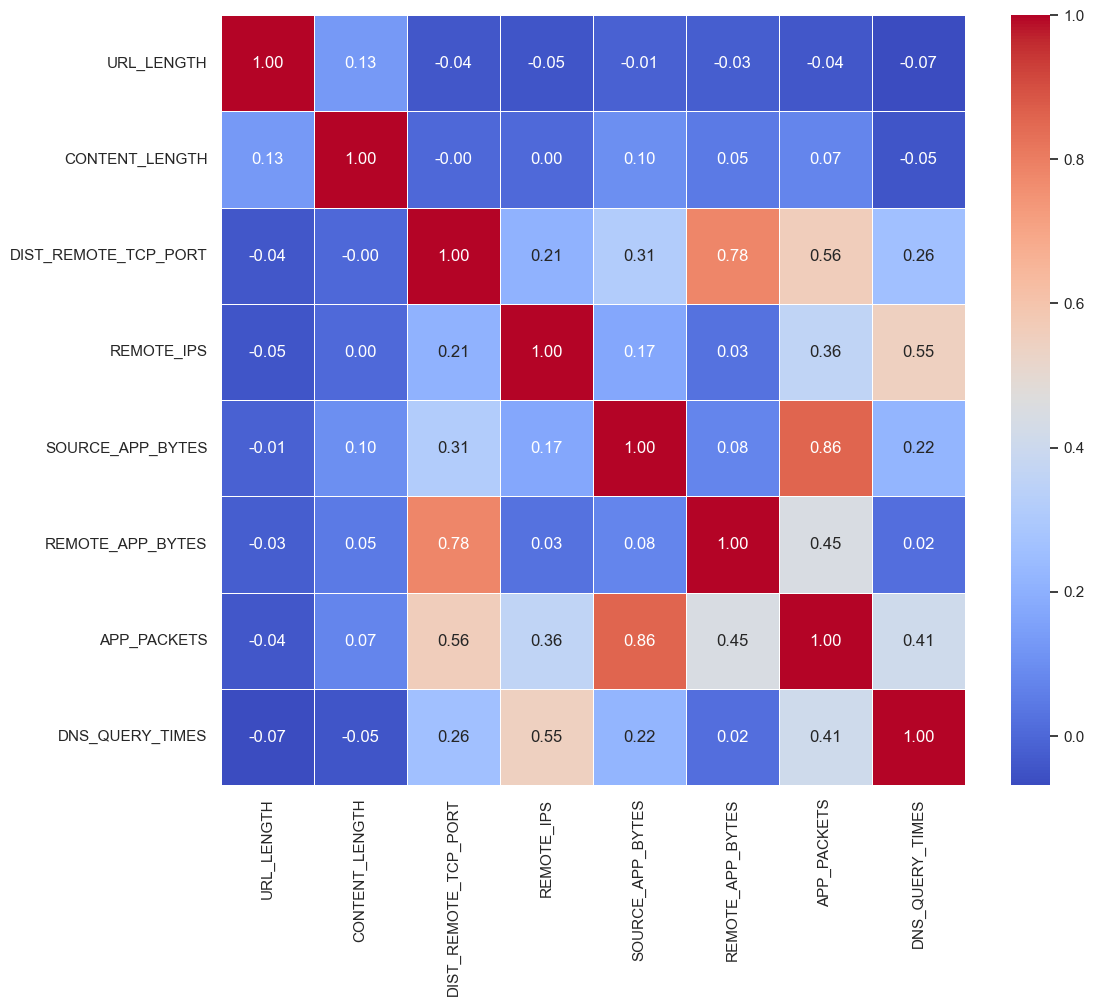

In [92]:
columns = ['URL_LENGTH', 'CONTENT_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES']

correlation = df[columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [93]:
df.isnull().sum()


URL                            0
URL_LENGTH                     0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [94]:
df.drop(columns=['CONTENT_LENGTH'], inplace=True)

df


,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,1153,832,9,2.0,1
1,B0_2314,16,UTF-8,Apache/2.4.10,NaN,NaN,NaN,NaN,17,7,4,1265,1230,17,0.0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0
3,B0_113,17,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,18784,4380,39,8.0,0
4,B0_403,17,UTF-8,NaN,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,186,0,0,0.0,1
1777,M4_41,198,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,124,0,0,0.0,1
1778,B0_162,201,utf-8,Apache/2.2.16 (Debian),US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,132181,6945,87,4.0,0
1779,B0_1152,234,ISO-8859-1,cloudflare-nginx,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0,0.0,0


In [ ]:
# 800 + missing values is too much almost 45% of the dataset

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [95]:

df.isnull().sum()

URL                            0
URL_LENGTH                     0
CHARSET                        7
SERVER                       176
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [96]:
df.rename(columns={"WHOIS_COUNTRY": "country", 
                   "WHOIS_STATEPRO": "state", 
                   "WHOIS_REGDATE": "reg_date", 
                   "WHOIS_UPDATED_DATE": "upd_date", 
                   "TCP_CONVERSATION_EXCHANGE": "conv_exchange", 
                   "DIST_REMOTE_TCP_PORT": "tcp_port"}, inplace=True)
df.columns = df.columns.str.lower()
df.columns

Index(['url', 'url_length', 'charset', 'server', 'country', 'state',
       'reg_date', 'upd_date', 'conv_exchange', 'tcp_port', 'remote_ips',
       'source_app_bytes', 'remote_app_bytes', 'app_packets',
       'dns_query_times', 'type'],
      dtype='object')

In [97]:
country_mapping = {
    'CY': 'CY',
    'Cyprus': 'CY',
    'US': 'US',
    'us': 'US',
    'SE': 'SE',
    'se': 'SE',
    'GB': 'GB',
    'United Kingdom': 'GB',
    "[u'GB'; u'UK']": 'GB'
}

df['country'] = df['country'].map(country_mapping)

df.sample(4)


,url,url_length,charset,server,country,state,reg_date,upd_date,conv_exchange,tcp_port,remote_ips,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
1260,B0_497,63,ISO-8859-1,Apache,US,OH,20/03/2002 0:00,18/02/2017 0:00,31,5,6,17664,2459,33,2.0,0
1356,B0_545,69,utf-8,nginx,US,Illinois,19/04/2006 0:00,29/07/2013 0:00,19,0,4,18769,2358,25,6.0,0
1314,B0_1197,67,UTF-8,Apache/2.4.6 (CentOS) mod_fcgid/2.3.9 PHP/5.6.30,NaN,NaN,23/02/2010 0:00,5/01/2016 0:00,0,0,0,0,0,0,0.0,0
812,B0_498,47,ISO-8859-1,NaN,US,CA,29/03/1997 0:00,29/11/2016 0:00,55,47,6,110342,7819,65,10.0,0


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

<Axes: xlabel='country', ylabel='count'>

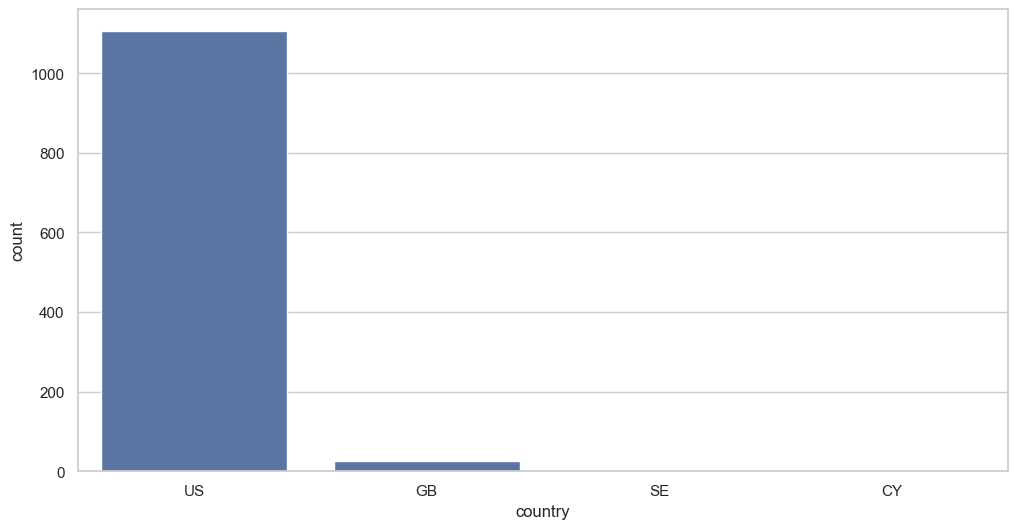

In [98]:
plt.figure(figsize=(12, 6))
sns.countplot(x="country", data=df, order=df["country"].value_counts().index)



#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [99]:
top_countries = df['country'].value_counts().nlargest(10).index

df['country'] = df['country'].apply(lambda x: x if x in top_countries else "other")


df.head()


,url,url_length,charset,server,country,state,reg_date,upd_date,conv_exchange,tcp_port,remote_ips,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
0,M0_109,16,iso-8859-1,nginx,other,NaN,10/10/2015 18:21,NaN,7,0,2,1153,832,9,2.0,1
1,B0_2314,16,UTF-8,Apache/2.4.10,other,NaN,NaN,NaN,17,7,4,1265,1230,17,0.0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,other,NaN,NaN,NaN,0,0,0,0,0,0,0.0,0
3,B0_113,17,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,18784,4380,39,8.0,0
4,B0_403,17,UTF-8,NaN,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,129889,4586,61,4.0,0


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [100]:
df.drop(columns=['state', 'reg_date','upd_date' ], inplace=True)

df.columns


Index(['url', 'url_length', 'charset', 'server', 'country', 'conv_exchange',
       'tcp_port', 'remote_ips', 'source_app_bytes', 'remote_app_bytes',
       'app_packets', 'dns_query_times', 'type'],
      dtype='object')

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [101]:
df.dtypes


url                  object
url_length            int64
charset              object
server               object
country              object
conv_exchange         int64
tcp_port              int64
remote_ips            int64
source_app_bytes      int64
remote_app_bytes      int64
app_packets           int64
dns_query_times     float64
type                  int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [102]:

df.drop(columns=["url"], inplace=True)

df.columns
        


Index(['url_length', 'charset', 'server', 'country', 'conv_exchange',
       'tcp_port', 'remote_ips', 'source_app_bytes', 'remote_app_bytes',
       'app_packets', 'dns_query_times', 'type'],
      dtype='object')

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [104]:
df['charset'].value_counts()

charset
UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [109]:
top_servers = df['server'].value_counts().nlargest(10).index


df['server'] = df['server'].apply(lambda x: x if x in top_servers else 'other')

df['server'].value_counts()


server
other                    750
Apache                   386
nginx                    211
Microsoft-HTTPAPI/2.0    113
cloudflare-nginx          94
Microsoft-IIS/7.5         51
GSE                       49
Server                    49
YouTubeFrontEnd           42
nginx/1.12.0              36
Name: count, dtype: int64

![Think Hard](../think-hard.jpg)

In [ ]:
# did the same as before with 10 values, then the exercise asked for 4 only so just changed the .nlargets()

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [110]:
top_servers = df['server'].value_counts().nlargest(4).index


df['server'] = df['server'].apply(lambda x: x if x in top_servers else 'other')

df['server'].value_counts()



server
other                    1071
Apache                    386
nginx                     211
Microsoft-HTTPAPI/2.0     113
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [111]:
website_dummy = pd.get_dummies(df, drop_first=True)

website_dummy.head()



,url_length,conv_exchange,tcp_port,remote_ips,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type,charset_ISO-8859-1,...,charset_utf-8,charset_windows-1251,charset_windows-1252,server_Microsoft-HTTPAPI/2.0,server_nginx,server_other,country_GB,country_SE,country_US,country_other
0,16,7,0,2,1153,832,9,2.0,1,False,...,False,False,False,False,True,False,False,False,False,True
1,16,17,7,4,1265,1230,17,0.0,0,False,...,False,False,False,False,False,True,False,False,False,True
2,16,0,0,0,0,0,0,0.0,0,False,...,False,False,False,True,False,False,False,False,False,True
3,17,31,22,3,18784,4380,39,8.0,0,True,...,False,False,False,False,True,False,False,False,True,False
4,17,57,2,5,129889,4586,61,4.0,0,False,...,False,False,False,False,False,True,False,False,True,False


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [113]:

website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   url_length                    1781 non-null   int64  
 1   conv_exchange                 1781 non-null   int64  
 2   tcp_port                      1781 non-null   int64  
 3   remote_ips                    1781 non-null   int64  
 4   source_app_bytes              1781 non-null   int64  
 5   remote_app_bytes              1781 non-null   int64  
 6   app_packets                   1781 non-null   int64  
 7   dns_query_times               1780 non-null   float64
 8   type                          1781 non-null   int64  
 9   charset_ISO-8859-1            1781 non-null   bool   
 10  charset_UTF-8                 1781 non-null   bool   
 11  charset_iso-8859-1            1781 non-null   bool   
 12  charset_us-ascii              1781 non-null   bool   
 13  cha

In [114]:
website_dummy['dns_query_times'].fillna(website_dummy['dns_query_times'].mean(), inplace=True)

website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   url_length                    1781 non-null   int64  
 1   conv_exchange                 1781 non-null   int64  
 2   tcp_port                      1781 non-null   int64  
 3   remote_ips                    1781 non-null   int64  
 4   source_app_bytes              1781 non-null   int64  
 5   remote_app_bytes              1781 non-null   int64  
 6   app_packets                   1781 non-null   int64  
 7   dns_query_times               1781 non-null   float64
 8   type                          1781 non-null   int64  
 9   charset_ISO-8859-1            1781 non-null   bool   
 10  charset_UTF-8                 1781 non-null   bool   
 11  charset_iso-8859-1            1781 non-null   bool   
 12  charset_us-ascii              1781 non-null   bool   
 13  cha

C:\Users\ateso\AppData\Local\Temp\ipykernel_20724\2606647591.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  website_dummy['dns_query_times'].fillna(website_dummy['dns_query_times'].mean(), inplace=True)


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [116]:
from sklearn.model_selection import train_test_split

X = website_dummy.drop('type', axis=1)
y = website_dummy['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [118]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [120]:

model.fit(X_train, y_train)


c:\Users\ateso\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Confusion Matrix:
 [[299   7]
 [ 39  12]]
0.8711484593837535


What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
"""
 The accuracy seems to be very high and correctly predicting 87% but 
high accuracy could be simply predicting the majority class.

I see as follows : 

TP: 12
TN: 299
FP: 7
FN: 39

"""



#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [122]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(max_depth=3)

decision_tree_model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3)

To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

In [123]:
y_probabilities = decision_tree_model.predict_proba(X_test)[:, 1]

y_pred_threshold = (y_probabilities >= 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_threshold)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred_threshold)
print(accuracy)


Confusion Matrix:
 [[292  14]
 [ 13  38]]
0.9243697478991597


#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [126]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(max_depth=5)

decision_tree_model.fit(X_train, y_train)

y_probabilities_5 = decision_tree_model.predict_proba(X_test)[:, 1]

y_pred_threshold_5 = (y_probabilities_5 >= 0.5).astype(int)

conf_matrix_5 = confusion_matrix(y_test, y_pred_threshold_5)
print("Confusion Matrix:\n", conf_matrix_5)

accuracy = accuracy_score(y_test, y_pred_threshold_5)
print(accuracy)


Confusion Matrix:
 [[298   8]
 [ 20  31]]
0.9215686274509803


Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:

"""
DEPTH 3

Confusion Matrix:
 [[292  14]
 [ 13  38]] 
0.9243697478991597 
 
----------------------- 
DEPTH 5 
 
Confusion Matrix: 
 [[298   8] 
 [ 20  31]] 
0.9215686274509803 
 
"Maybe, the more you are tested, the mo re likely you are to fail ?"
 
Answer i got :  
 
Your observation, "Maybe, the more you  are tested, the more likely you are to fail?" is a thoughtful one. 
It's true that increasing the complexity of a model (e.g., higher depth in a decision tree) 
can lead to overfitting, especially if the model starts capturing noise in the training data. 
The model might become less generalizable to new, unseen data.

In this case, it seems that the simpler model with a lower depth is performing slightly better on the test set. 
This aligns with the principle of Occam's Razor, suggesting that simpler models are often 
preferred when they perform equally well or better than more complex models.

My conclusion: no need to overthink sometimes (overfeed the model), sometimes the simpler the better.

"""


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [127]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

X_train_scaled = robust_scaler.fit_transform(X_train)

X_test_scaled = robust_scaler.transform(X_test)

logistic_model_scaled = LogisticRegression()
logistic_model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = logistic_model_scaled.predict(X_test_scaled)

conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
print(conf_matrix_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(accuracy_scaled)


"""
The previous model is more accurate and fits better.

perhaps less sensitive for some reason on data.

LogisticRegresiion was the most accurate of the three in this case.


"""



[[298   8]
 [ 29  22]]
0.896358543417367
